In [1]:
import numpy as np

from PyPO.System import System
from PyPO.Enums import FieldComponents, Units

s = System()

2025-10-13 22:14:40 - WARNING - System override set to True. 


In [2]:
parabola = {
            "name"      : "primary",
            "pmode"     : "focus",
            "gmode"     : "uv",
            "vertex"    : np.zeros(3),
            "focus_1"   : np.array([0, 0, 3.5e3]),
            "lims_u"    : np.array([300, 5e3]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([2501, 2500]),
            "rms"       : 42e-3,
            "rms_seed"  : 42
            }

s.addParabola(parabola)

parabola_perfect = {
            "name"      : "primary_perfect",
            "pmode"     : "focus",
            "gmode"     : "uv",
            "vertex"    : np.zeros(3),
            "focus_1"   : np.array([0, 0, 3.5e3]),
            "lims_u"    : np.array([300, 5e3]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([2501, 2500]),
            }

s.addParabola(parabola_perfect)

focus = {
            "name"      : "focus",
            "gmode"     : "xy",
            "lims_x"    : np.array([-1, 1]),
            "lims_y"    : np.array([-1, 1]),
            "gridsize"  : np.array([11, 11]),
            "flip"      : True
            }

s.addPlane(focus)

foc_pri = {
            "name"      : "foc_pri",
            "gmode"     : "uv",
            "lims_u"    : np.array([300, 5e3]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([2501, 2500])
            }

s.addPlane(foc_pri)
s.translateGrids("foc_pri", np.array([0, 0, 3.5e3]))

GPODict_l = []
lam_range = [1.5, 1.25, 1]

for lam in lam_range:
    PSDict = {                                                                                                                                                                     
                "name"      : f"source_{lam}",                                                                                                                                  
                "lam"       : lam,                                                                                                                                                                                                                                                                                                                               
                "E0"        : 1,                                                                                                                                                                                                                                 
                "pol"       : np.array([1, 0, 0])                                                                                                          
    }

    s.createPointSource(PSDict, "focus")

    

s.translateGrids("focus", np.array([0,0,3.5e3]))
eta_t_perfect = []
eta_t_rms = []
for lam in lam_range:
    source_to_primary = {
            "t_name"    : "primary",
            "s_current" : f"source_{lam}",
            "epsilon"   : 10,
            "mode"      : "EHP",
            "name_EH"   : "EH_pri",
            "name_P"    : "P_pri"
            }
    
    s.runPO(source_to_primary)
    
    hybrid_2 = {
            "fr_in"     : "P_pri",
            "field_in"  : "EH_pri",
            "t_name"    : "foc_pri",
            "fr_out"    : "foc_pri_frame",
            "field_out" : "foc_pri_hfield",
            "comp"      : FieldComponents.Ex
    }

    s.runHybridPropagation(hybrid_2)
    eta_t_rms.append(s.calcTaper("foc_pri_hfield", FieldComponents.Ex))
    
    source_to_primary = {
            "t_name"    : "primary_perfect",
            "s_current" : f"source_{lam}",
            "epsilon"   : 10,
            "mode"      : "EHP",
            "name_EH"   : "EH_pri",
            "name_P"    : "P_pri"
            }
    
    s.runPO(source_to_primary)
    
    hybrid_2 = {
            "fr_in"     : "P_pri",
            "field_in"  : "EH_pri",
            "t_name"    : "foc_pri",
            "fr_out"    : "foc_pri_frame",
            "field_out" : "foc_pri_hfield",
            "comp"      : FieldComponents.Ex
    }

    s.runHybridPropagation(hybrid_2)
    eta_t_perfect.append(s.calcTaper("foc_pri_hfield", FieldComponents.Ex))
print(eta_t_perfect, eta_t_rms)

2025-10-13 22:14:40 - INFO - Added paraboloid primary to system. 
2025-10-13 22:14:40 - INFO - Added paraboloid primary_perfect to system. 
2025-10-13 22:14:40 - INFO - Added plane focus to system. 
2025-10-13 22:14:40 - INFO - Added plane foc_pri to system. 
2025-10-13 22:14:40 - INFO - Translated element foc_pri by ('0.000e+00', '0.000e+00', '3.500e+03') millimeters. 
2025-10-13 22:14:40 - INFO - Translated element focus by ('0.000e+00', '0.000e+00', '3.500e+03') millimeters. 
2025-10-13 22:14:40 - WORK - *** Starting PO propagation *** 
2025-10-13 22:14:40 - WORK - Propagating source_1.5 on focus to primary, propagation mode: EHP. 
2025-10-13 22:14:40 - WORK - Hardware: running 256 CUDA threads per block. 
2025-10-13 22:14:40 - WORK - ... Calculating ... 
2025-10-13 22:14:51 - WORK - *** Finished: 5.423 seconds *** 
2025-10-13 22:14:51 - WORK - *** Starting hybrid propagation *** 
2025-10-13 22:15:14 - WORK - *** Finished: 23.326 seconds *** 
2025-10-13 22:15:15 - WORK - *** Startin

Contents of system:
Reflectors 4:
    primary
    primary_perfect
    focus
    foc_pri
Groups 0:
Frames 2:
    P_pri
    foc_pri_frame
Currents 3:
    source_1.5
    source_1.25
    source_1
Fields 5:
    source_1.5
    source_1.25
    source_1
    EH_pri
    foc_pri_hfield
Scalar Fields 0:



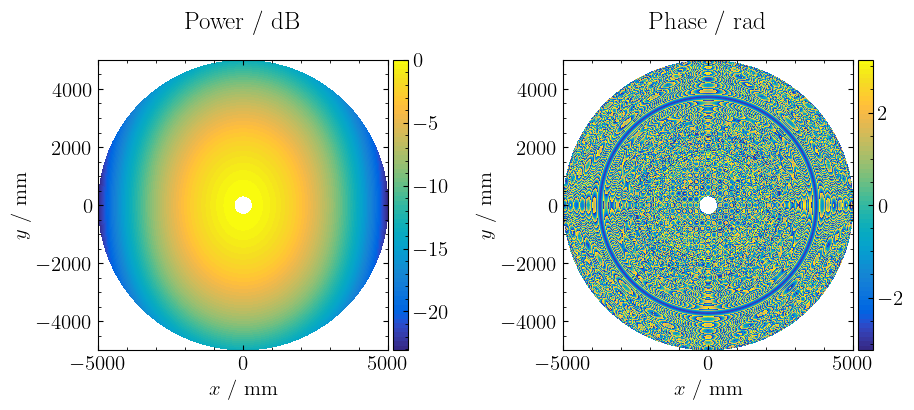

[0.9318004622699025, 0.9032807652706197, 0.8530344005249921]


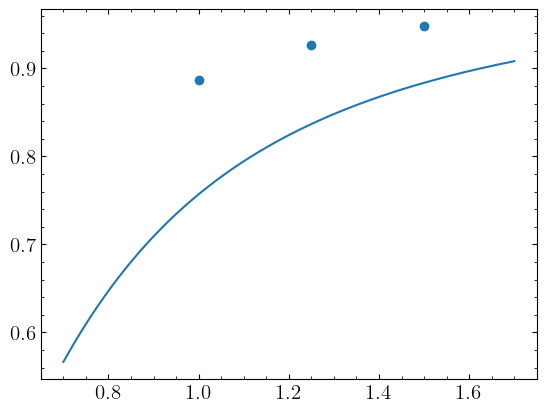

In [13]:
print(s)
s.plotBeam2D("EH_pri", FieldComponents.Ex)

lam_fine = np.linspace(1.7, 0.7, 1000)

eta_ruze = np.exp(-(4 * np.pi * 42e-3 / lam_fine)**2)
eta_ruze_range = np.exp(-(4 * np.pi * 42e-3 / np.array(lam_range))**2)
eta_ap = [x / y for (x, y) in zip(eta_t_rms, eta_t_perfect)]

print([1/(x / y) for (x, y) in zip(eta_ap, eta_ruze_range)])


import matplotlib.pyplot as plt
plt.plot(lam_fine, eta_ruze)
plt.scatter(lam_range, eta_ap)
plt.show()

In [ ]:
grids_sec = s.generateGrids("secondary")

h_rim = np.max(grids_sec.z)

rim_hyperbola = {
            "name"      : "rim_sec",
            "gmode"     : "uv",
            "flip"      : True,
            "lims_u"    : np.array([0, 300]) * 2,
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([1501, 500])
            }

s.addPlane(rim_hyperbola)
s.translateGrids("rim_sec", np.array([0, 0, h_rim]))


aper_sec = {
        "plot"      : True,
        "center"    : np.zeros(2),
        "outer"     : np.array([300, 300]),
        "inner"     : np.zeros(2)
}

eta_s_l = []
for lam in lam_range:
    source_to_rim_sec = {
            "t_name"    : "rim_sec",
            "s_current" : f"source_{lam}",
            "epsilon"   : 10,
            "mode"      : "EH",
            "name_EH"   : f"EH_rim_sec_{lam}"
            }
    
    s.runPO(source_to_rim_sec)

    eta_s_l.append(s.calcSpillover(f"EH_rim_sec_{lam}", FieldComponents.Ex, aper_sec))
print(eta_s_l)

In [ ]:
s.copyElement("secondary", "secondary_over")
s.system["secondary_over"]["gridsize"] = np.array([2501, 2500])

foc_pri = {
            "name"      : "foc_pri",
            "gmode"     : "uv",
            "lims_u"    : np.array([300, 5e3]),
            "lims_v"    : np.array([0, 360]),
            "gridsize"  : np.array([1501, 1500])
            }

s.addPlane(foc_pri)
s.translateGrids("foc_pri", np.array([0, 0, 3.5e3]))

eta_t_l = []
for lam in lam_range:
    source_to_sec_over = {
            "t_name"    : "secondary_over",
            "s_current" : f"source_{lam}",
            "epsilon"   : 10,
            "mode"      : "EHP",
            "name_EH"   : "EH_ref_sec",
            "name_P"    : "P_sec"
            }
    
    s.runPO(source_to_sec_over)
    
    hybrid_1 = {
            "fr_in"     : "P_sec",
            "field_in"  : "EH_ref_sec",
            "t_name"    : "primary",
            "fr_out"    : "primary_frame",
            "field_out" : "primary_hfield",
            "start"     : np.array([0, 0, 3.5e3]),
            "interp"    : False
    }
    
    hybrid_2 = {
            "fr_in"     : "primary_frame",
            "field_in"  : "primary_hfield",
            "t_name"    : "foc_pri",
            "fr_out"    : "foc_pri_frame",
            "field_out" : "foc_pri_hfield",
            "comp"      : FieldComponents.Ex
    }
    s.runHybridPropagation(hybrid_1)
    s.runHybridPropagation(hybrid_2)
    eta_t_l.append(s.calcTaper("foc_pri_hfield", FieldComponents.Ex))
print(eta_t_l)